___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Datasets Used In This Course
In no particular order these are the datasets used throughout the course. In most cases we have modified the source data to build .csv files with selected columns, records, and a DateTime index.

[CO2 Levels atop Mauna Loa, HI](#CO2-Levels-atop-Mauna-Loa,-HI)<br>
[US Macroeconomic Data](#US-Macroeconomic-Data)<br>
[Starbucks Stock Data](#Starbucks-Stock-Data)<br>
[Energy Production](#Energy-Production)<br>
[US Population Data](#U.S.-Population-Data)<br>
[Temperature Data - Mt. Washington, NH](#Temperature-Data---Mt.-Washington,-NH)<br>
[Temperature Data - Mauna Loa, HI](#Temperature-Data---Mauna-Loa,-HI)<br>
[Airline Passengers](#Airline-Passengers)<br>
[Daily Total Female Births](#Daily-Total-Female-Births)<br>
[Monthly Milk Production](#Monthly-Milk-Production)<br>
[Danube River Discharge](#Danube-River-Discharge)<br>
[Rhine River Discharge](#Rhine-River-Discharge)<br>
[Price of Ground Chuck](#Price-of-Ground-Chuck)<br>
[Real Manufacturing and Trade Inventories](#Real-Manufacturing-and-Trade-Inventories)<br>
[California Publishing Industry Employees](#California-Publishing-Industry-Employees)<br>
[California Hospitality Industry Employees](#California-Hospitality-Industry-Employees)<br>
[RideAustin](#RideAustin)<br>
[Value of Manufacturers' Shipments](#Value-of-Manufacturers'-Shipments)<br>
[M2 Money Stock](#M2-Money-Stock)<br>
[Personal Spending](#Personal-Spending)<br>
[US Population by County](#U.S.-Population-by-County)<br>

<div class="alert alert-info"><h3>Additional Resources:</h3>

<strong>
<a href='https://fred.stlouisfed.org/'>Federal Reserve Bank of St. Louis</a></strong>&nbsp;&nbsp;<font color=black>Federal Reserve Economic Data (FRED)</font><br>

<strong>
<a href='https://www.ncdc.noaa.gov/data-access'>NOAA</a></strong>&nbsp;&nbsp;<font color=black>National Centers for Environmental Information (NCEI) (formerly NCDC)</font><br>
<strong>
<a href='https://www.statsmodels.org/stable/datasets/index.html'>Statsmodels</a></strong>&nbsp;&nbsp;<font color=black>Datasets Package</font><br>
<strong>
<a href='https://www.census.gov/econ/currentdata/'>U.S. Census Bureau</a></strong>&nbsp;&nbsp;<font color=black>Business and Industry; Time Series/Trend Charts</font><br>
<strong>
<a href='https://www.bls.gov/data/'>U.S. Dept. of Labor</a></strong>&nbsp;&nbsp;<font color=black>Bureau of Labor Statistics</font><br>

NOTE: As of April 15th, 2019 <a href='https://datamarket.com/'>DataMarket.com</a> is no longer available. DataMarket has been acquired by <a href='https://www.qlik.com/us/products/qlik-data-market'>Qlik</a>.
</div>

### Perform Standard Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

___
##  CO2 Levels atop Mauna Loa, HI 
Atmospheric CO₂ levels from air samples collected at Mauna Loa Observatory, Hawaii, USA from March 1958 to November 2018.<br>
This dataset lacks a DateTime index, and instead relies on a decimal_date value supplied by the provider. Also, missing data is handled with an interpolated values column.
Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

In [2]:
df1 = pd.read_csv('../Data/co2_mm_mlo.csv')
df1.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [3]:
# To create a DatetimeIndex
df1['date']=pd.to_datetime(dict(year=df1['year'], month=df1['month'], day=1))
df1.set_index('date',inplace=True)
df1.index.freq = 'MS'
df1.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


### Alternatively, load from statsmodels built-in datasets
<div class="alert alert-danger"><strong>NOTE: </strong>At the time of this writing the statsmodels co2 dataset has a <a href='https://github.com/statsmodels/statsmodels/issues/4775'>known issue</a> with pandas.<br>
<tt><font color=black>&nbsp;&nbsp;df = sm.datasets.co2.load_pandas().data</font></tt><br>
raises <tt>TypeError: __new__() got an unexpected keyword argument 'format'</tt><br>
This is due to be fixed in an upcoming release.</div>

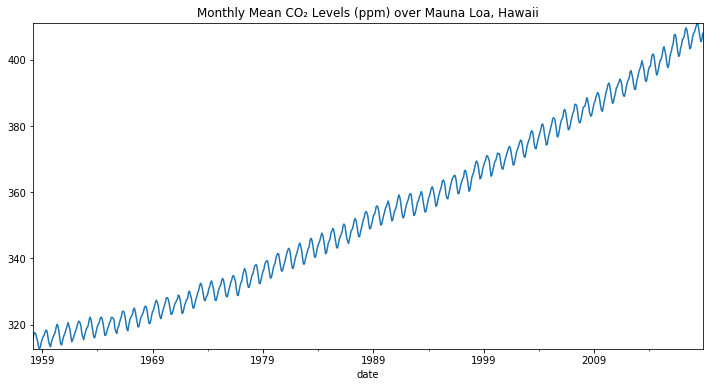

In [4]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
#df1.plot('decimal_date','interpolated',figsize=(12,6),title=title).autoscale(axis='both',tight=True);
df1['interpolated'].plot(figsize=(12,6),title=title).autoscale(axis='both',tight=True);

___
## US Macroeconomic Data
Contains U.S. Macroeconomic Data from Q1 1959 to Q3 2009.

In [6]:
df2 = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
df2.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Alternatively, load from statsmodels built-in datasets

In [14]:
df2sm = sm.datasets.macrodata.load_pandas().data
df2sm.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
print(sm.datasets.macrodata.NOTE)
df2sm.head()

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


___
## Starbucks Stock Data
Contains daily closing prices and daily trading volumes for Starbucks stock from 2015 to 2018.

In [4]:
df3 = pd.read_csv('../Data/starbucks.csv', index_col='Date', parse_dates=True)
df3.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


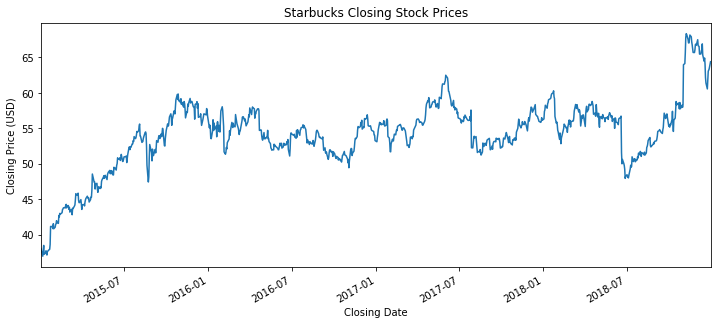

In [8]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df3['Close'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Energy Production
Contains data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989. Source: https://fred.stlouisfed.org/series/IPG2211A2N

In [3]:
df4 = pd.read_csv('../Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df4.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


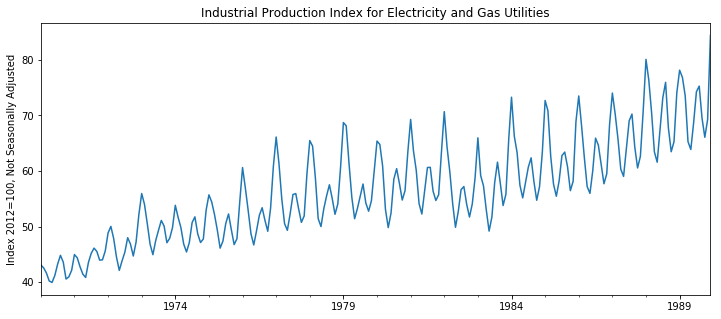

In [4]:
title='Industrial Production Index for Electricity and Gas Utilities'
ylabel='Index 2012=100, Not Seasonally Adjusted'
xlabel=''

ax = df4['EnergyIndex'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## U.S. Population Data
Contains monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, or 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.<br>
Source: https://fred.stlouisfed.org/series/POPTHM

In [14]:
df5 = pd.read_csv('../Data/uspopulation.csv',index_col=0,parse_dates=True)
df5.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


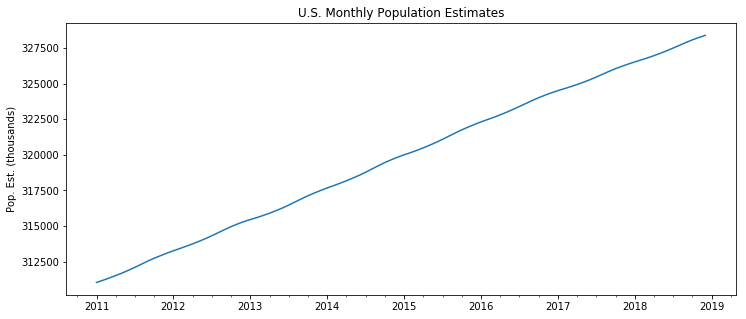

In [16]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df5['PopEst'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Temperature Data - Mt. Washington, NH
Contains Daily Minimum Dry Bulb Temperatures (°F) recorded on the summit of Mt. Washington in New Hampshire from December 1, 2014 to November 30, 2018. The dataset contains four years of temperature data. (1461 records, 7 columns)<br>
Source: https://www.ncdc.noaa.gov/data-access

In [12]:
df6 = pd.read_csv('../Data/MtWashingtonDailyTemps.csv',index_col='DATE',parse_dates=True)
df6.index.freq = 'D'
df6.head()

,MinTemp,MaxTemp,AvgTemp,AvgWindSpeed,Sunrise,Sunset
DATE,,,,,,
2014-12-01,3,36,20,65.1,700,1608
2014-12-02,1,22,12,34.7,702,1607
2014-12-03,8,32,20,53.0,703,1607
2014-12-04,-5,9,2,60.2,704,1607
2014-12-05,6,17,12,30.5,705,1607


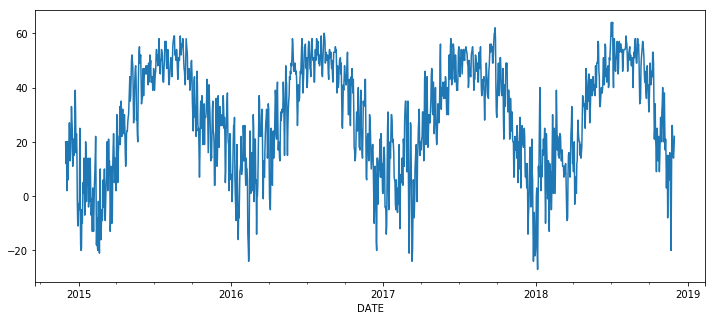

In [13]:
df6['AvgTemp'].plot(figsize=(12,5));

___
## Temperature Data - Mauna Loa, HI
Contains Daily Minimum Dry Bulb Temperatures (°F) recorded at Mauna Loa in Hawaii from January 1, 2014 to December 30, 2018. The dataset contains five years of temperature data. (1825 records, 6 columns)<br>
Source: https://www.ncdc.noaa.gov/data-access

In [7]:
df7 = pd.read_csv('../Data/MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df7.index.freq = 'D'
df7.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


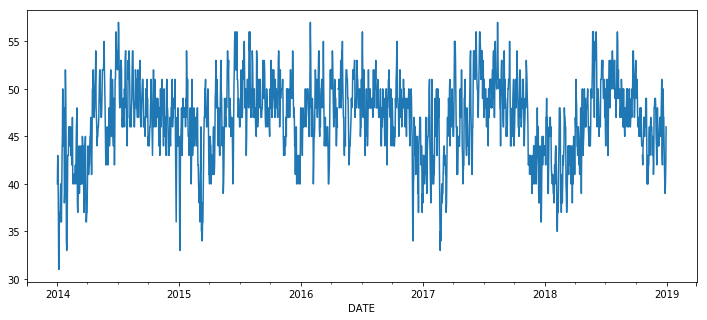

In [8]:
df7['AvgTemp'].plot(figsize=(12,5));

## Airline Passengers


In [5]:
df8 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df8.index.freq = 'MS'
df8.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


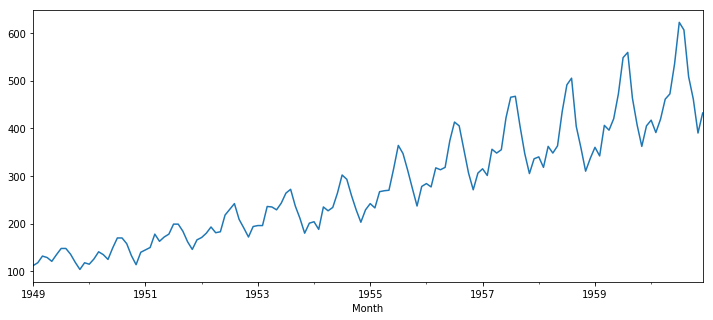

In [6]:
df8['Thousands of Passengers'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

___
## Daily Total Female Births
Contains Daily Total Female Births in California during 1959. The dataset contains 365 records.<br>
Source: https://datamarket.com/data/set/235k/daily-total-female-births-in-california-1959

In [10]:
df9 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df9.index.freq = 'D'
df9.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


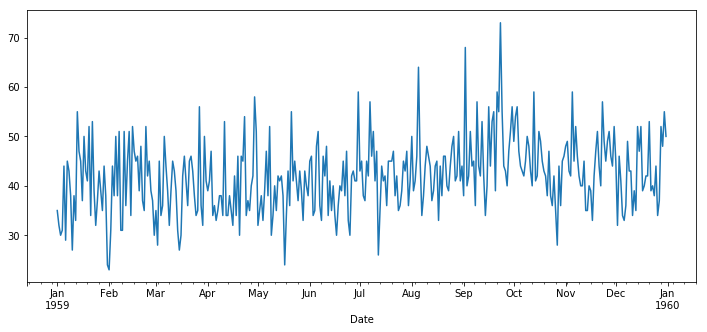

In [11]:
df9['Births'].plot(figsize=(12,5));

___
## Monthly Milk Production
Contains monthly milk production values in pounds per cow from January 1962 to December 1975. (168 records, 2 columns)<br>
Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75

In [2]:
df10 = pd.read_csv('../Data/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df10.index.freq = 'MS'
df10.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


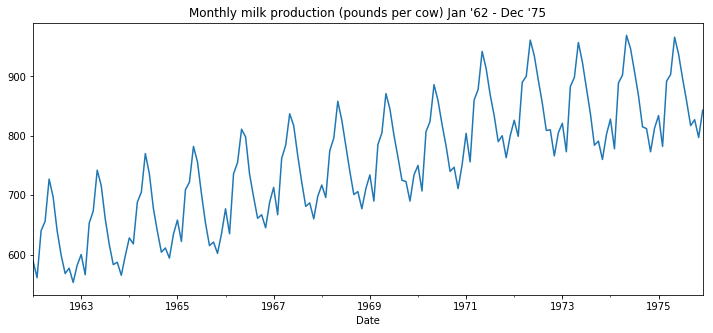

In [6]:
title = "Monthly milk production (pounds per cow) Jan '62 - Dec '75"
df10['Production'].plot(title=title,figsize=(12,5)).autoscale(axis='x', tight=True);

In [7]:
df10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Production,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


___
## Danube River Discharge
Mean annual discharge $(m^{3}/s)$ of the Danube River at Orshava, Romania, 1837–1957 (120 records)<br>Source: https://datamarket.com/data/set/22qc/danube-river-at-orshava-romania-1837-1957

In [4]:
df11 = pd.read_csv('../Data/danube_river_discharge.csv',index_col='Year',parse_dates=True)
df11.index.freq = 'AS'
df11.head()

,Discharge
Year,
1837-01-01,6315.937
1838-01-01,6015.683
1839-01-01,4525.167
1840-01-01,5361.574
1841-01-01,4267.812


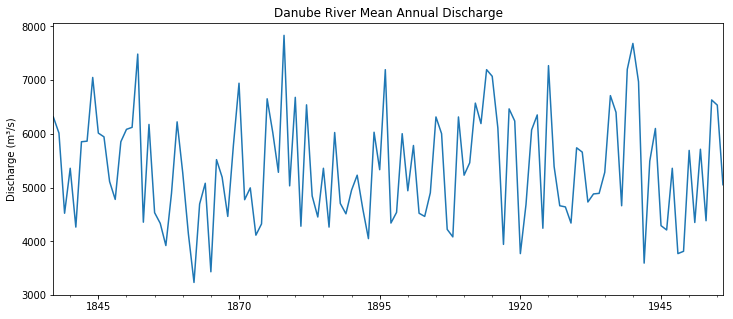

In [10]:
title = 'Danube River Mean Annual Discharge'
ylabel='Discharge (m³/s)'
xlabel='' # we don't really need a label here

ax = df11['Discharge'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Rhine River Discharge
Mean annual discharge $(m^{3}/s)$ of the Rhine River near Basel, Switzerland, 1807–1957 (150 records)<br>Source: https://datamarket.com/data/set/22wp/rhine-river-near-basle-switzerland-1807-1957

In [11]:
df12 = pd.read_csv('../Data/rhine_river_discharge.csv',index_col='Year',parse_dates=True)
df12.index.freq = 'AS'
df12.head()

,Discharge
Year,
1807-01-01,864.884
1808-01-01,1033.141
1809-01-01,826.923
1810-01-01,1018.777
1811-01-01,1118.296


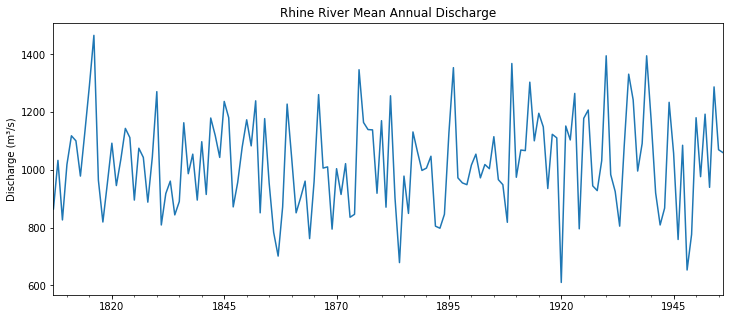

In [12]:
title = 'Rhine River Mean Annual Discharge'
ylabel='Discharge (m³/s)'
xlabel='' # we don't really need a label here

ax = df12['Discharge'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Price of Ground Chuck
Average price of ground chuck (100% beef) per pound. Source: U.S. Bureau of Labor Statistics, Consumer Price Index<br>
https://www.bls.gov/charts/consumer-price-index/consumer-price-index-average-price-data.htm 

In [2]:
df13 = pd.read_csv('../Data/price_of_ground_chuck.csv',index_col='Month',parse_dates=True)
df13.index.freq = 'MS'
df13.head()

,Price
Month,
1999-02-01,1.862
1999-03-01,1.834
1999-04-01,1.833
1999-05-01,1.812
1999-06-01,1.815


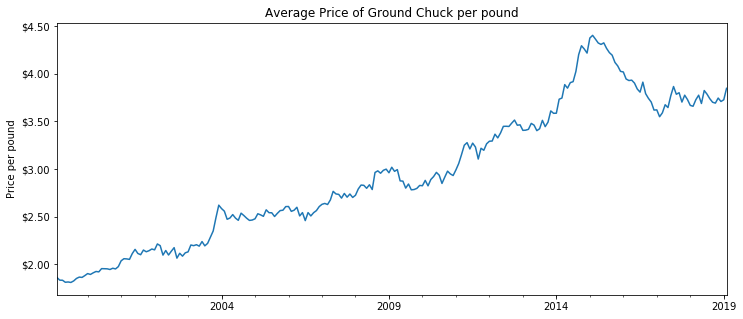

In [6]:
# HERE'S A TRICK TO PUT DOLLAR SIGNS ON Y-AXIS TICKS
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%1.2f')

title = 'Average Price of Ground Chuck per pound'
ylabel='Price per pound'
xlabel='' # we don't really need a label here

ax = df13['Price'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___
## Real Manufacturing and Trade Inventories
Real Manufacturing and Trade Inventory Estimates in Chained 2012 Dollars, Seasonally Adjusted, Jan 1997-Dec 2018 (264 records)<br>For information on how these estimates are obtained visit https://apps.bea.gov/scb/pdf/2009/10%20October/1009_isr.pdf<br>
Source: https://fred.stlouisfed.org/series/INVCMRMT

In [3]:
df14 = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df14.index.freq = 'MS'
df14.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


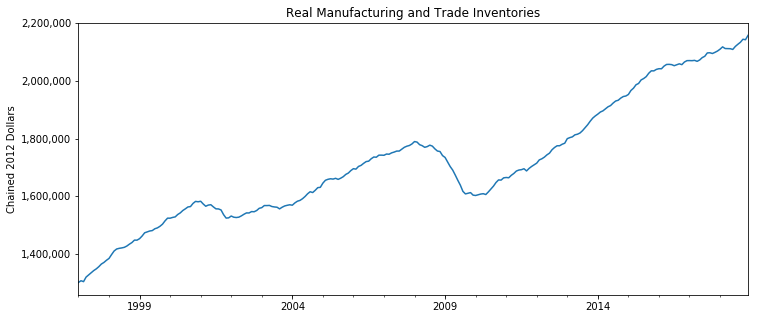

In [11]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title='Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df14['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___
## California Publishing Industry Employees
All Employees: Information: Newspaper, Periodical, Book, and Directory Publishers in California in Thousands of Persons, Not Seasonally Adjusted, from Jan 1990-Dec 2018 (348 records)<br>
Source: https://fred.stlouisfed.org/series/SMU06000005051110001

In [12]:
df15 = pd.read_csv('../Data/PublishingEmployees.csv',index_col='Date',parse_dates=True)
df15.index.freq = 'MS'
df15.head()

,Employees
Date,
1990-01-01,69.1
1990-02-01,69.2
1990-03-01,69.9
1990-04-01,69.7
1990-05-01,69.8


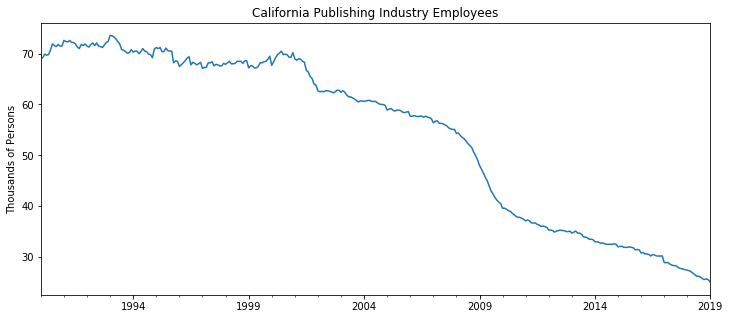

In [15]:
title='California Publishing Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df15['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## California Hospitality Industry Employees
All Employees: Leisure and Hospitality in California in Thousands of Persons, Not Seasonally Adjusted, from Jan 1990-Dec 2018 (348 records)
Source: https://fred.stlouisfed.org/series/CALEIHN

In [7]:
df16 = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df16.index.freq = 'MS'
df16.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


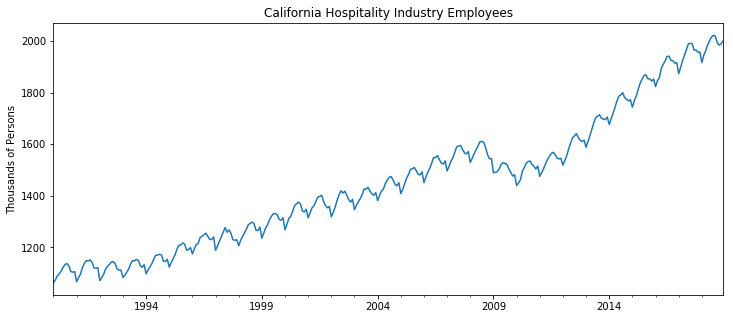

In [8]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df16['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## RideAustin
RideAustin is a non-profit, municipal ridesharing service based in Austin, Texas, with a model comparing directly to that of Uber. The data covers rides requested from June 4, 2016 to February 7, 2017 (249 days), just over 35 weeks. It shows a clear weekly cycle, with peak ride demand typically on Saturday.<br>
Data was made available by CEO Andy Tryba, at https://data.world/andytryba/rideaustin

In [3]:
df17 = pd.read_csv('../Data/RideAustin.csv',index_col='Date',parse_dates=True)
df17.index.freq = 'D'
df17.head()

,Rides,PRCP,TMAX,TMIN,AWND,GustSpeed2,Fog,HeavyFog,Thunder
Date,,,,,,,,,
2016-06-04,7,0.1,86,67,4.9,13.0,1,0,0
2016-06-05,12,0.0,88,68,5.8,14.1,0,0,0
2016-06-06,19,0.0,90,70,4.3,13.0,0,0,0
2016-06-07,22,0.0,92,69,2.0,8.1,0,0,0
2016-06-08,35,0.0,92,70,2.7,12.1,1,0,0


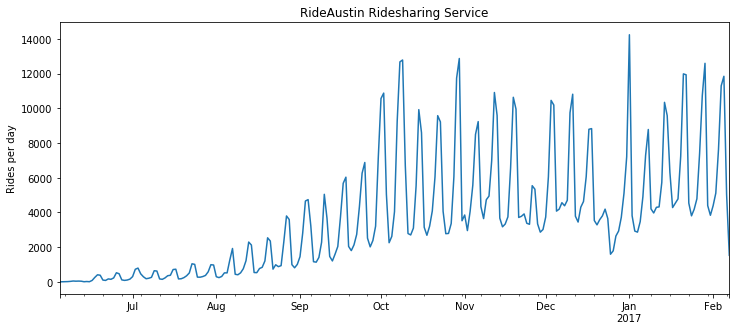

In [4]:
title='RideAustin Ridesharing Service'
ylabel='Rides per day'
xlabel='' # we don't really need a label here

ax = df17['Rides'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

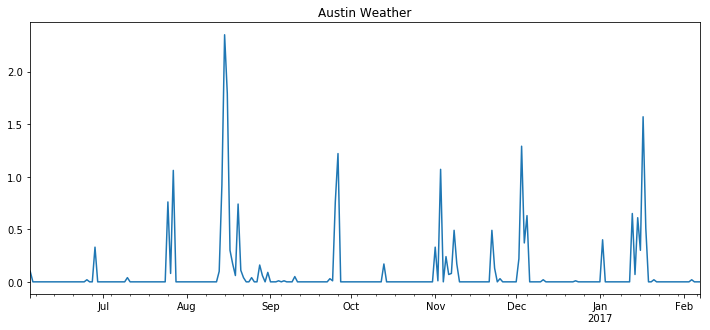

In [7]:
title = 'Austin Weather'
ylabel=''
xlabel=''

ax = df17['PRCP'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Value of Manufacturers' Shipments
Value of Manufacturers' Shipments for All Manufacturing Industries in millions of dollars, not seasonally adjusted. Monthly data, January 1992 to January 2019 (325 records).<br>
Source: https://fred.stlouisfed.org/series/UMTMVS

In [3]:
df18 = pd.read_csv('../Data/UMTMVS.csv',index_col='DATE',parse_dates=True)
df18.index.freq = 'MS'
df18.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


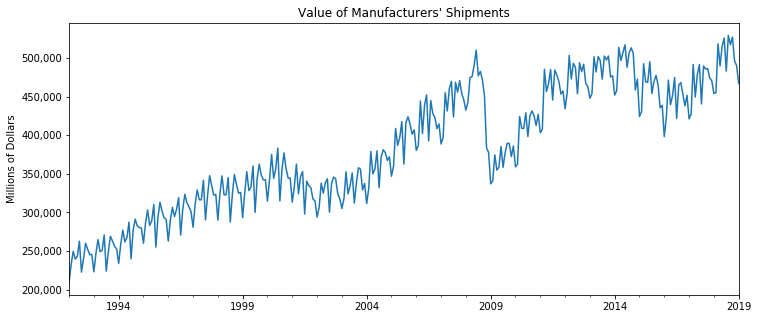

In [5]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title="Value of Manufacturers' Shipments" # be careful with quotes here!
ylabel='Millions of Dollars'
xlabel='' # we don't really need a label here

ax = df18['UMTMVS'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___
## M2 Money Stock 
U.S. M2 Money Stock in Billions of Dollars, Monthly, Seasonally Adjusted, 1/1/95-12/1/15 (252 records)<br>
Compared to M1, M2 includes a broader set of financial assets held principally by households. M2 consists of M1 plus: (1) savings deposits (which include money market deposit accounts, or MMDAs); (2) small-denomination time deposits (time deposits in amounts of less than $100,000); and (3) balances in retail money market mutual funds (MMMFs).<br>
Source: https://fred.stlouisfed.org/series/M2SL

In [2]:
df19 = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col='Date',parse_dates=True)
df19.index.freq = 'MS'
df19.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


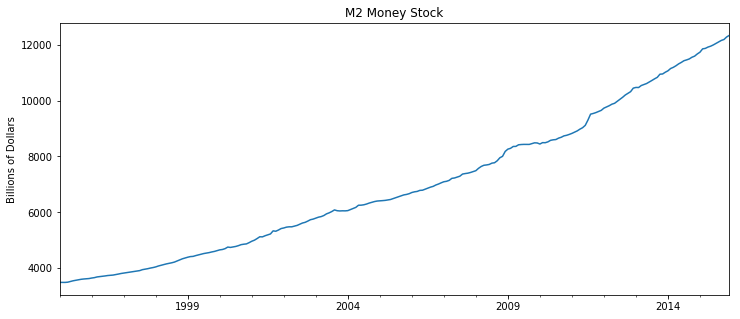

In [3]:
title = 'M2 Money Stock'
ylabel='Billions of Dollars'
xlabel=''

ax = df19['Money'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Personal Spending
U.S. Personal Consumption Expenditures in Billions of Dollars, Monthly, Seasonally Adjusted, 1/1/95-12/1/15 (252 records)<br>
See Bureau of Economic Analysis, BEA Account Code: DPCERC<br>
A Guide to the National Income and Product Accounts of the United States (NIPA) - http://www.bea.gov/national/pdf/nipaguid.pdf<br>
Source: https://fred.stlouisfed.org/series/PCE

In [4]:
df20 = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
df20.index.freq = 'MS'
df20.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


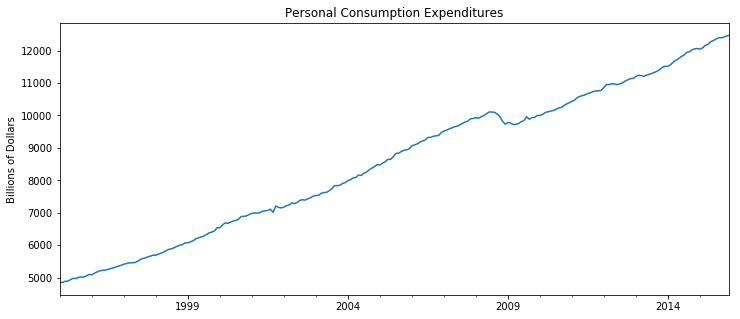

In [5]:
title = 'Personal Consumption Expenditures'
ylabel='Billions of Dollars'
xlabel=''

ax = df20['Spending'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## U.S. Population by County
Population data from the 2010 Census and 2017 Estimates for counties in the 50 U.S. States and District of Columbia. <br>
Data is used for pandas exercises - it does <em>not</em> contain dates. (3142 records, 4 columns)<br>
Source: https://www.census.gov/data/tables/2017/demo/popest/counties-total.html

In [5]:
dfx = pd.read_csv('../Data/population_by_county.csv')
dfx.head()

,County,State,2010Census,2017PopEstimate
0,Abbeville County,South Carolina,25417,24722
1,Acadia Parish,Louisiana,61773,62590
2,Accomack County,Virginia,33164,32545
3,Ada County,Idaho,392365,456849
4,Adair County,Iowa,7682,7054
